### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
df18 = pd.read_csv('data/2018.csv')

In [3]:
df18['Year'] = '2018'

In [4]:
df17 = pd.read_csv('data/2017.csv')

In [5]:
df17['Year'] = '2017'

In [6]:
df16 = pd.read_csv('data/2016.csv')

In [7]:
df16['Year'] = '2016'

In [8]:
df15 = pd.read_csv("data/2015.csv")

In [9]:
df15['Year'] = '2015'

In [11]:
df15 = df15.rename(columns = {'Happiness Rank': 'Rank'} )
df16 = df16.rename(columns = {'Happiness Rank': 'Rank'} )
df17 = df17.rename(columns = {'Happiness.Rank': 'Rank', 'Happiness.Score': 'Happiness Score',  'Economy..GDP.per.Capita.':'Economy (GDP per Capita)', 'Health..Life.Expectancy':'Health (Life Expectancy)', 'Trust..Government.Corruption.':'Trust (Government Corruption)'})
df18 = df18.rename(columns = {'Score': 'Happiness Score','Social_Support':'Family', 'GDP_per_Capita':'Economy (GDP per Capita)', 'Freedom_To_Make_Life_Choices':'Freedom','Healthy_Life_Expectancy':'Health (Life Expectancy)', 'Perceptions_Of_Corruption':'Trust (Government Corruption)'})                   
                   

In [12]:
df = pd.concat([df15, df16,df17,df18])

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,Country,Dystopia Residual,Dystopia.Residual,Economy (GDP per Capita),Family,Freedom,GDP_Per_Capita,Generosity,Happiness Score,Health (Life Expectancy),...,Lower Confidence Interval,Rank,Region,Residual,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.51738,NaN,1.39651,1.34951,0.66557,NaN,0.29678,7.587,0.94143,...,NaN,1,Western Europe,NaN,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,NaN,1.30232,1.40223,0.62877,NaN,0.43630,7.561,0.94784,...,NaN,2,Western Europe,NaN,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,NaN,1.32548,1.36058,0.64938,NaN,0.34139,7.527,0.87464,...,NaN,3,Western Europe,NaN,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,NaN,1.45900,1.33095,0.66973,NaN,0.34699,7.522,0.88521,...,NaN,4,Western Europe,NaN,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,NaN,1.32629,1.32261,0.63297,NaN,0.45811,7.427,0.90563,...,NaN,5,North America,NaN,0.03553,0.32957,NaN,NaN,NaN,2015


### Rename variables

In [14]:
df['GDP'] = df[['Economy (GDP per Capita)', 'GDP_Per_Capita']].max(axis=1) # combine two columns together since data frames had different name

In [15]:
df['HealthLifeExpectancy'] = df[['Health (Life Expectancy)', 'Health..Life.Expectancy.']].max(axis=1)

In [16]:
df = df.rename(columns = {'Trust (Government Corruption)': 'Trust_GovCorruption', 'Happiness Score': 'HappinessScore'})

In [17]:
df = df[['Country', 'Rank', 'HappinessScore', 'Family', 
       'GDP', 'HealthLifeExpectancy', 'Freedom', 'Trust_GovCorruption', 'Generosity', 'Year']]

In [18]:
df.head()

,Country,Rank,HappinessScore,Family,GDP,HealthLifeExpectancy,Freedom,Trust_GovCorruption,Generosity,Year
0,Switzerland,1,7.587,1.34951,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.40223,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.36058,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.33095,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32261,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [24]:
df.isna().sum()

Country                 0
Rank                    0
HappinessScore          0
Family                  0
GDP                     0
HealthLifeExpectancy    0
Freedom                 0
Trust_GovCorruption     1
Generosity              0
Year                    0
dtype: int64

In [25]:
# create new columns of continents
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["Country"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

### Check NAs

In [26]:
df.isna().sum()

Country                 0
Rank                    0
HappinessScore          0
Family                  0
GDP                     0
HealthLifeExpectancy    0
Freedom                 0
Trust_GovCorruption     1
Generosity              0
Year                    0
continent               0
dtype: int64

In [27]:
df['Trust_GovCorruption'].fillna(df['Trust_GovCorruption'].median(),inplace=True) # impute one missing data with median

In [28]:
df.shape

(626, 11)

In [29]:
df.to_csv('happiness.csv')

In [621]:
df.head()

,Country,Rank,HappinessScore,Family,GDP,HealthLifeExpectancy,Freedom,Trust_GovCorruption,Generosity,Year,continent
0,Switzerland,1,7.587,1.34951,1.39651,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,2,7.561,1.40223,1.30232,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,3,7.527,1.36058,1.32548,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,4,7.522,1.33095,1.45900,0.88521,0.66973,0.36503,0.34699,2015,Europe
4,Canada,5,7.427,1.32261,1.32629,0.90563,0.63297,0.32957,0.45811,2015,North America


In [339]:
df = np.round(df, decimals=3) # round our data into 3 decimal places

## EDA  

## 1. stripplot continents on Happiness

Text(0.5, 0, 'Continents')

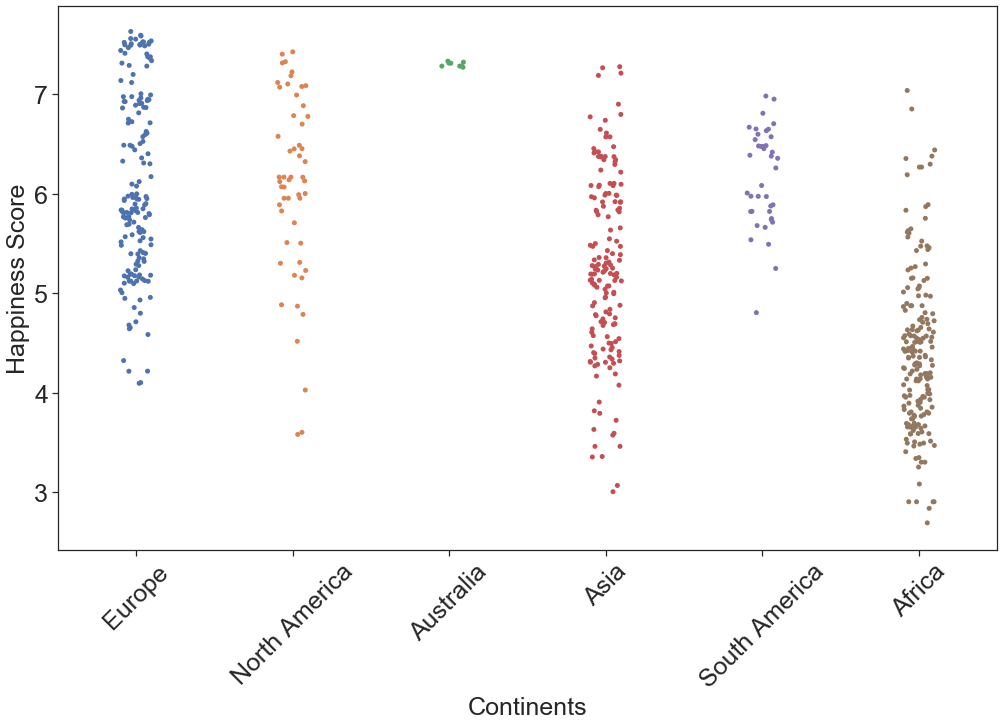

In [528]:
sns.stripplot(x="continent", y="HappinessScore", data=df, jitter=True)
plt.xticks(rotation=45, size = 25)
plt.yticks(size =25)
plt.ylabel(ylabel = 'Happiness Score', size =25)
plt.xlabel(xlabel = 'Continents', size =25)

## barplot : Continent  on Happiness


Text(0.5, 0, 'Continents')

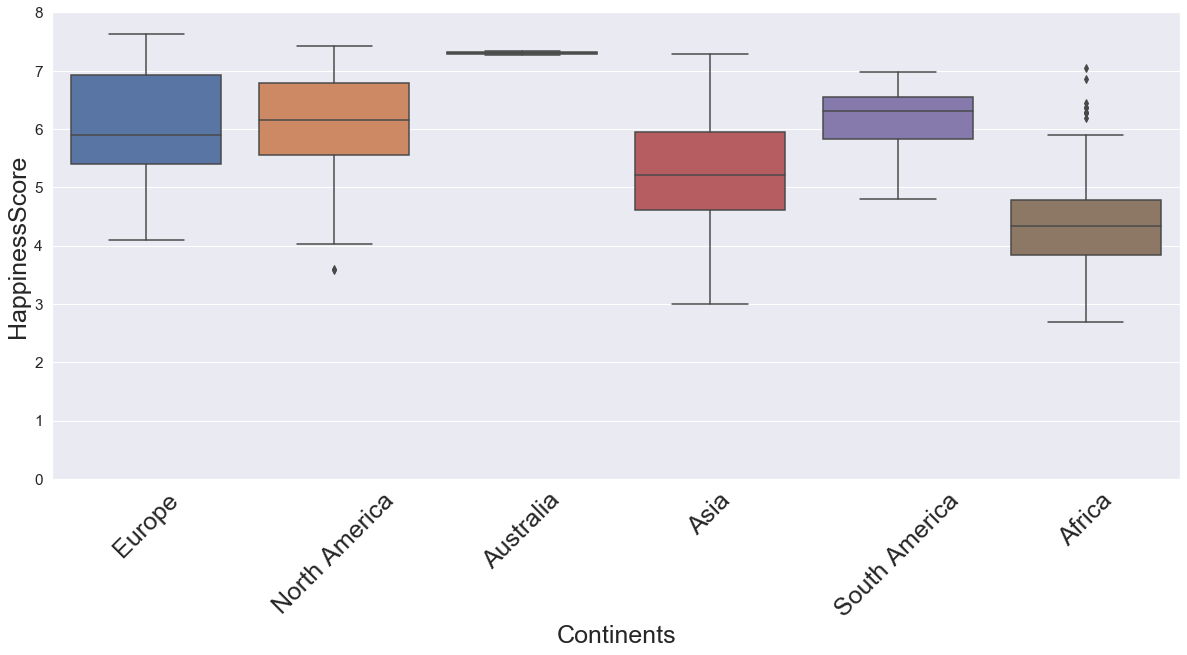

In [641]:
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x='continent', y="HappinessScore", data = df)
fig.axis(ymin=0, ymax=8)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'HappinessScore', size = 25)
plt.xlabel(xlabel = 'Continents',size = 25)

## 3. Plotly interactive map -  Country on Happiness Rank

In [477]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [516]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Rank'], 
           text = df['Country'],
           colorbar = {'title':'Rank'},
           colorscale = "blues")
layout = dict(title = 'Happiness Score From World Happiness Report Data From 2015-2018', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

## Selecting features and look at each features on happiness

In [630]:
features = ['HappinessScore', 'Family', 'GDP', 'HealthLifeExpectancy','Freedom', 'Trust_GovCorruption', 'Generosity']

## Correlation and heatmap

In [631]:
featcorr = df[features].corr()

In [650]:
featcorr

,HappinessScore,Family,GDP,HealthLifeExpectancy,Freedom,Trust_GovCorruption,Generosity
HappinessScore,1.000000,0.633668,0.788303,0.754389,0.550175,0.402838,0.153054
Family,0.633668,1.000000,0.566820,0.515739,0.440701,0.136146,-0.004167
GDP,0.788303,0.566820,1.000000,0.802116,0.329189,0.302797,-0.005749
HealthLifeExpectancy,0.754389,0.515739,0.802116,1.000000,0.357267,0.268741,0.056900
Freedom,0.550175,0.440701,0.329189,0.357267,1.000000,0.461249,0.289032
Trust_GovCorruption,0.402838,0.136146,0.302797,0.268741,0.461249,1.000000,0.311111
Generosity,0.153054,-0.004167,-0.005749,0.056900,0.289032,0.311111,1.000000


In [648]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set(font_scale=2)
sns.heatmap(featcorr, cmap = "BuPu", square = True)

# Assumptions for Linear Regression
1. Linearity
Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

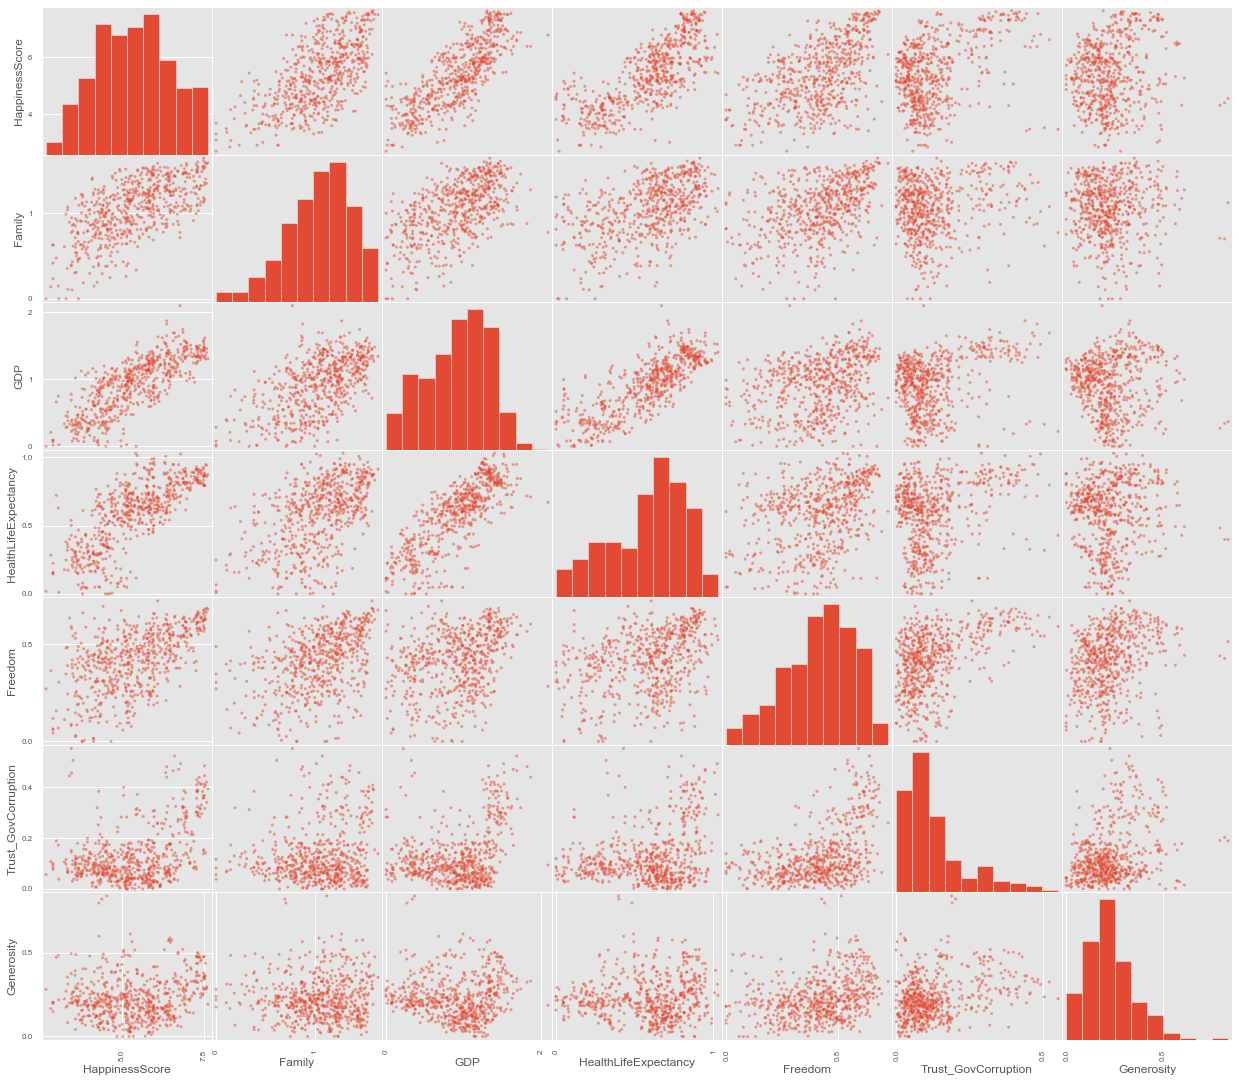

In [731]:
pd.plotting.scatter_matrix(df[features], figsize=[19, 19]);

/Users/zoe/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



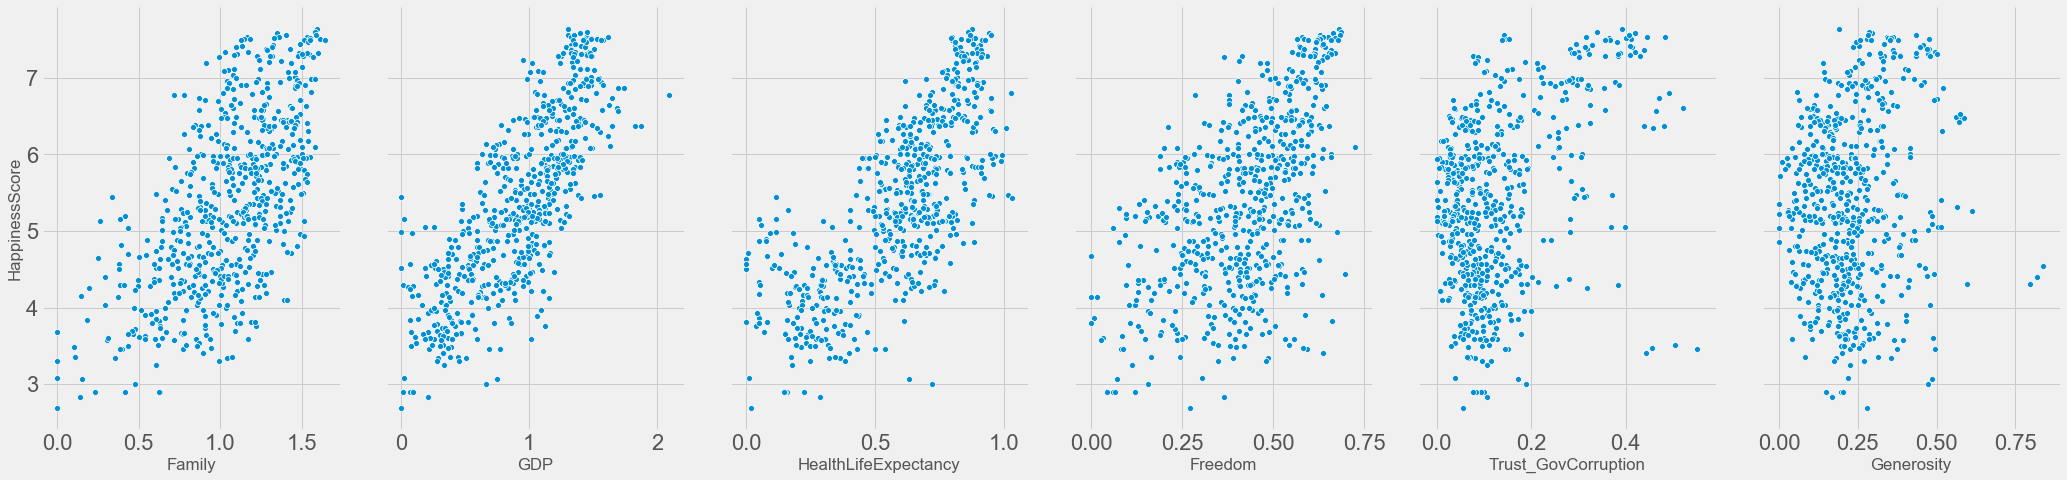

In [901]:
# visualize the relationship between the features and the response variable using scatterplots
p = sns.pairplot(df, x_vars=features, y_vars='HappinessScore', size=7, aspect=0.7)

## Regression MODEL1 

In [635]:
reg_mult = ols(formula = "HappinessScore~GDP+Family+HealthLifeExpectancy+Freedom+Trust_GovCorruption+Generosity",data=df).fit()
reg_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     336.5
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          4.01e-191
Time:                        10:22:31   Log-Likelihood:                -511.51
No. Observations:                 626   AIC:                             1037.
Df Residuals:                     619   BIC:                             1068.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2029      0.087     25.271      0.000       2.032       2.374
GDP                      1.1032      0.097     11.402      0.000       0.913       1.293
Family                   0.6363      0.088      7.202      0.000       0.463       0.810
HealthLifeExpectancy     1.1385      0.155      7.324      0.000       0.833       1.444
Freedom                  1.4216      0.183      7.776      0.000       1.063       1.781
Trust_GovCorruption      0.8664      0.244      3.544      0.000       0.386       1.346
Generosity               0.5377      0.189      2.849      0.005       0.167       0.908
==============================================================================
Omnibus:                        9.468   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.337
Skew:                          -0.227   Prob(JB):                      0.00569
Kurtosis:                       3.435   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check the Homoscedasticity Assumption - qqplot

0.8 percentile: 6.424
0.81 percentile: 6.45425
0.82 percentile: 6.4830000000000005
0.83 percentile: 6.5405
0.84 percentile: 6.596
0.85 percentile: 6.6485
0.86 percentile: 6.7125
0.87 percentile: 6.783999999999999
0.88 percentile: 6.867
0.89 percentile: 6.91425
0.9 percentile: 6.951499999999999
0.91 percentile: 6.99375
0.92 percentile: 7.104
0.93 percentile: 7.203250000000001
0.94 percentile: 7.284
0.95 percentile: 7.314
0.96 percentile: 7.364
0.97 percentile: 7.430499999999999
0.98 percentile: 7.4995
0.99 percentile: 7.52675


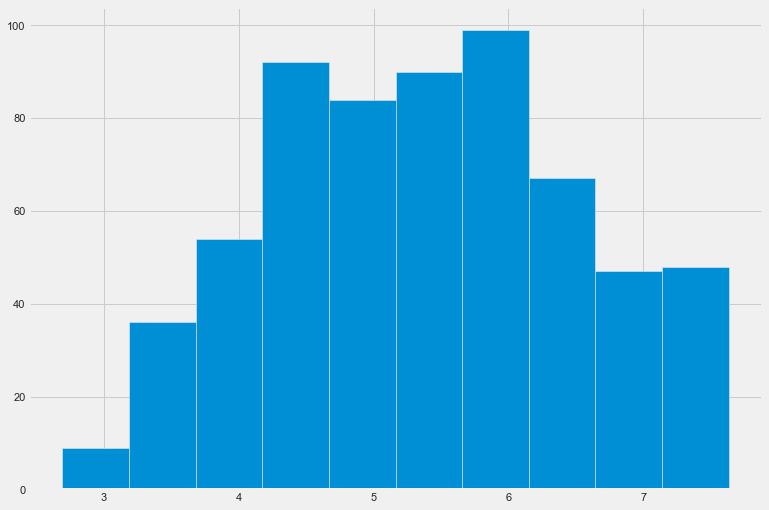

In [277]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.HappinessScore.quantile(q=q)))

df.HappinessScore.hist()

In [651]:
### Check the Homoscedasticity Assumption - qqplot

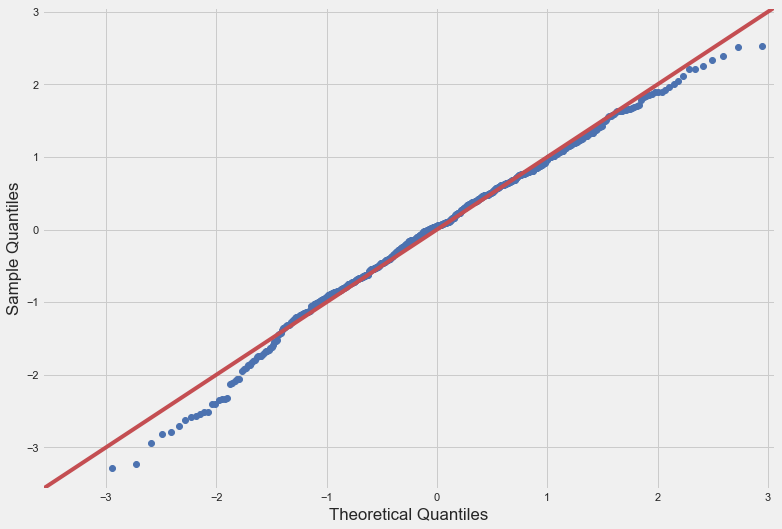

In [276]:
fig = sm.graphics.qqplot(reg_mult.resid, dist=stats.norm, line='45', fit=True)


In [743]:
df['Trust_GovCorruption'] = df['Trust_GovCorruption'].map(lambda x: np.log(x))

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [744]:
df['Generosity'] = df['Generosity'].map(lambda x: np.log(x))

/Users/zoe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



In [747]:
df.replace([np.inf, -np.inf], 0, inplace=True)


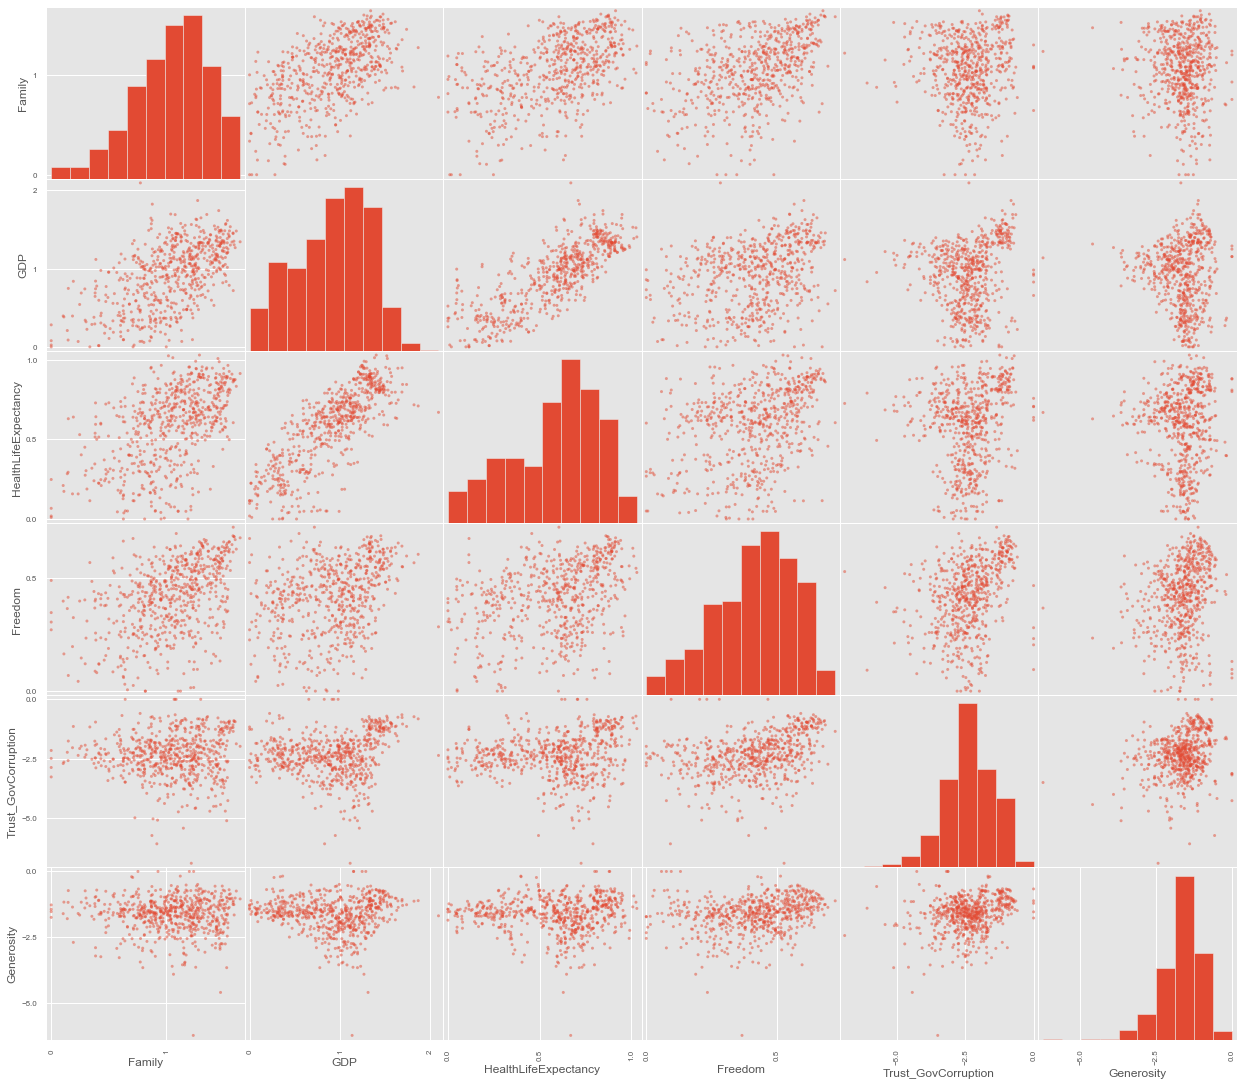

In [748]:
pd.plotting.scatter_matrix(df[features], figsize=[19, 19]);

In [749]:
df.columns

Index(['Country', 'Rank', 'HappinessScore', 'Family', 'GDP',
       'HealthLifeExpectancy', 'Freedom', 'Trust_GovCorruption', 'Generosity',
       'Year', 'continent'],
      dtype='object')

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Variable')]

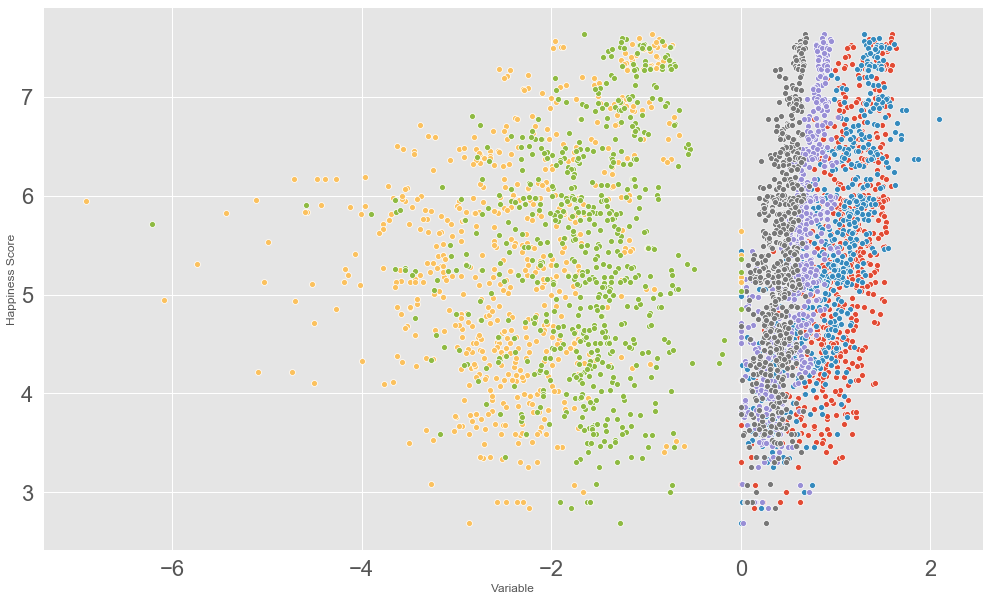

In [750]:
for col in df[features]:
    ax = sns.scatterplot(df[col], df['HappinessScore'])
ax.set(xlabel='Variable', ylabel='Happiness Score')

## Homoscedasticity- Residual plot

3. Check for Homoscedasticity¶
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms

In [777]:
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

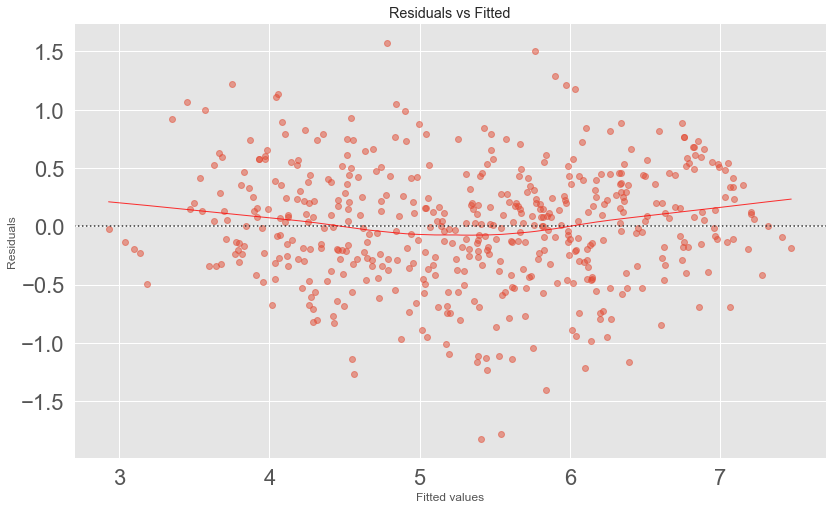

In [779]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'HappinessScore', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

# for i in abs_resid_top_3.index:
#     plot_lm_1.axes[0].annotate(i, 
#                                xy=(model_fitted_y[i], 
#                                    model_residuals[i]));


## VIF MULTICOLLINEARITY

In [859]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [863]:
calculate_vif(X)

,Var,Vif
4,HealthLifeExpectancy,19.64
0,GDP,19.00
2,Family,18.72
1,Freedom,9.23
5,Generosity,6.70
3,Trust_GovCorruption,6.57


In [ ]:
## We will remove Health Life Expectancy since it has the highest VIF, highly correlated with GDP

## Second Regression model without multicollinearity model

In [884]:
reg_mult2 = ols(formula = "HappinessScore~GDP+Family+Freedom+Trust_GovCorruption+Generosity",data=df).fit()
reg_mult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     360.5
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.18e-180
Time:                        13:42:40   Log-Likelihood:                -537.16
No. Observations:                 625   AIC:                             1086.
Df Residuals:                     619   BIC:                             1113.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2797      0.090     25.262      0.000       2.102       2.457
GDP                     1.6064      0.072     22.244      0.000       1.465       1.748
Family                  0.6852      0.092      7.419      0.000       0.504       0.867
Freedom                 1.5636      0.190      8.250      0.000       1.191       1.936
Trust_GovCorruption     0.8249      0.255      3.235      0.001       0.324       1.326
Generosity              0.6318      0.196      3.219      0.001       0.246       1.017
==============================================================================
Omnibus:                        8.811   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.615
Skew:                          -0.215   Prob(JB):                      0.00817
Kurtosis:                       3.429   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normality of Error Terms

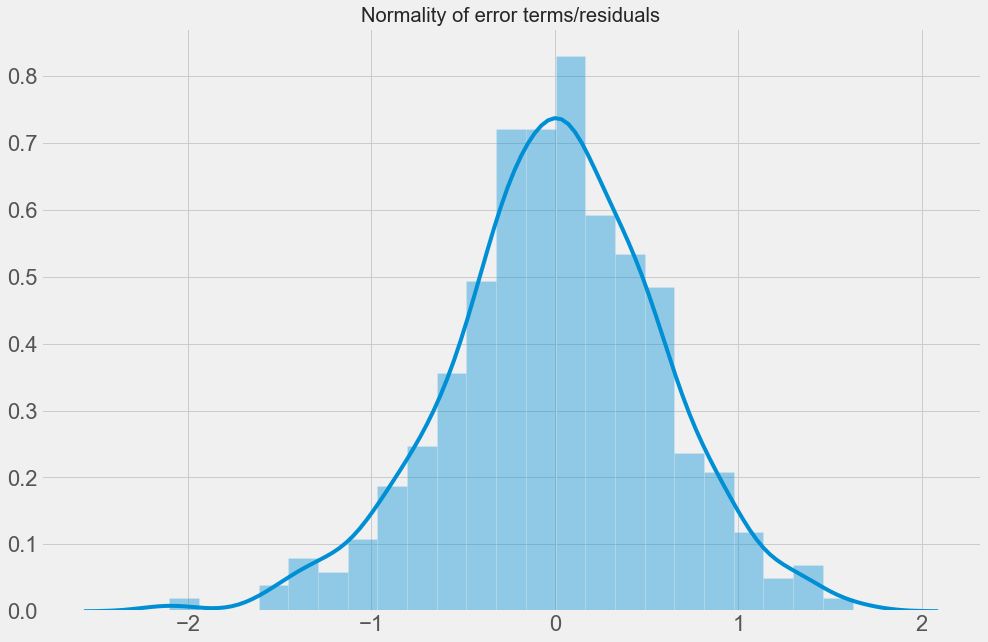

In [885]:
p = sns.distplot(reg_mult2.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

In [887]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(reg_mult2.resid , lags = 40)[1]) # p values of correlation of the residuals

3.481651243592045e-139

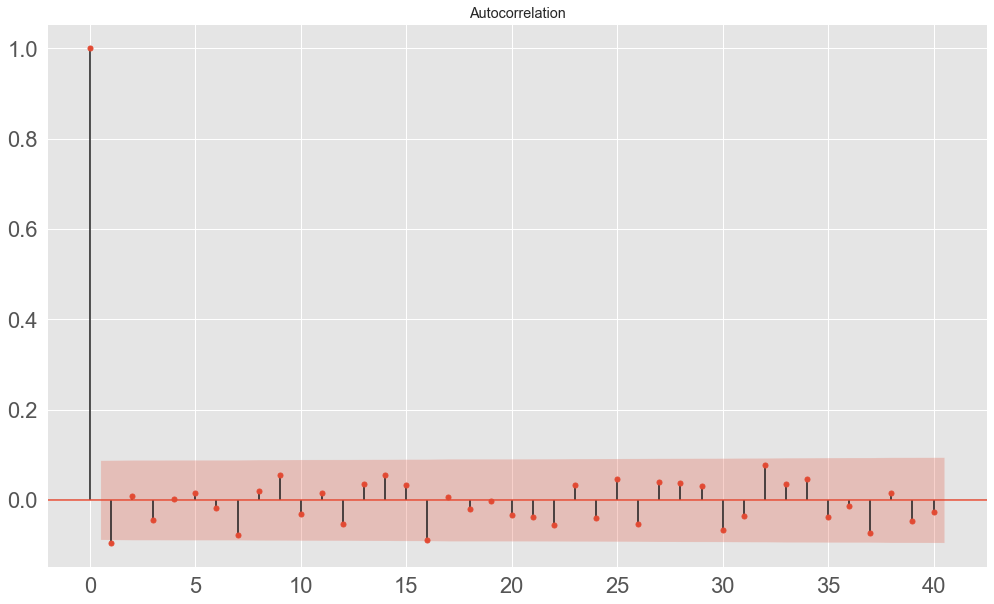

In [781]:
# autocorrelation
sm.graphics.tsa.plot_acf(model_residuals, lags=40)
plt.show()

## Now that we done with checking all assumptions, we want to use Stepwise selection to get the best variables with the most predcitvator power by automatic selection. In each step, a variable is considered for addition to or subtraction from the set of explanatory variables based on some prespecified criterion.

## Stepwise Selection 

In [751]:
X = df[['GDP','Freedom','Family','Trust_GovCorruption','HealthLifeExpectancy','Generosity']]
y = df.loc[:,'HappinessScore']

In [752]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

$ A way to test for errors in models created by step-wise regression, is to not rely on the model's F-statistic, significance, or multiple R, but instead assess the model against a set of data that was not used to create the model.[14] This is often done by building a model based on a sample of the dataset available (e.g., 70%) – the “training set” – and use the remainder of the dataset (e.g., 30%) as a validation set to assess the accuracy of the model. Accuracy is then often measured as the actual standard error (SE), MAPE (Mean absolute percentage error), or mean error between the predicted value and the actual value in the hold-out sample.[15] This method is particularly valuable when data are collected in different settings (e.g., different times, social vs. solitary situations) or when models are assumed to be generalizable.

In [753]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [754]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

438 188 438 188


In [755]:
stepwiseresult = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(stepwiseresult)

Add  GDP                            with p-value 2.99689e-96
Add  Freedom                        with p-value 1.74038e-30
Add  HealthLifeExpectancy           with p-value 1.76678e-11
Add  Family                         with p-value 1.12019e-08
Add  Trust_GovCorruption            with p-value 6.55974e-05
Add  Generosity                     with p-value 0.00699945
resulting features:
['GDP', 'Freedom', 'HealthLifeExpectancy', 'Family', 'Trust_GovCorruption', 'Generosity']


/Users/zoe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [ ]:
# remove Healthlifeexpectancy due to multicollinearity

In [ ]:
# Stepwise selection give us all variables except Generosity

In [857]:
reg_mult2 = ols(formula = "HappinessScore~GDP+Family+Freedom+Trust_GovCorruption+Generosity",data=df).fit()
reg_mult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     360.5
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.18e-180
Time:                        13:15:26   Log-Likelihood:                -537.16
No. Observations:                 625   AIC:                             1086.
Df Residuals:                     619   BIC:                             1113.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2797      0.090     25.262      0.000       2.102       2.457
GDP                     1.6064      0.072     22.244      0.000       1.465       1.748
Family                  0.6852      0.092      7.419      0.000       0.504       0.867
Freedom                 1.5636      0.190      8.250      0.000       1.191       1.936
Trust_GovCorruption     0.8249      0.255      3.235      0.001       0.324       1.326
Generosity              0.6318      0.196      3.219      0.001       0.246       1.017
==============================================================================
Omnibus:                        8.811   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.615
Skew:                          -0.215   Prob(JB):                      0.00817
Kurtosis:                       3.429   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [758]:
y_hat_train = reg_mult2.predict(X_train)
y_hat_test = reg_mult2.predict(X_test)

In [759]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [890]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.28273500126397155
Test Mean Squarred Error: 0.33283453912982025


In [761]:
y_pred = reg_mult2.predict(X_test)

In [762]:
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 0.45848346150968483
MSE 0.33283453912982025
RMSE 0.5769181390195842


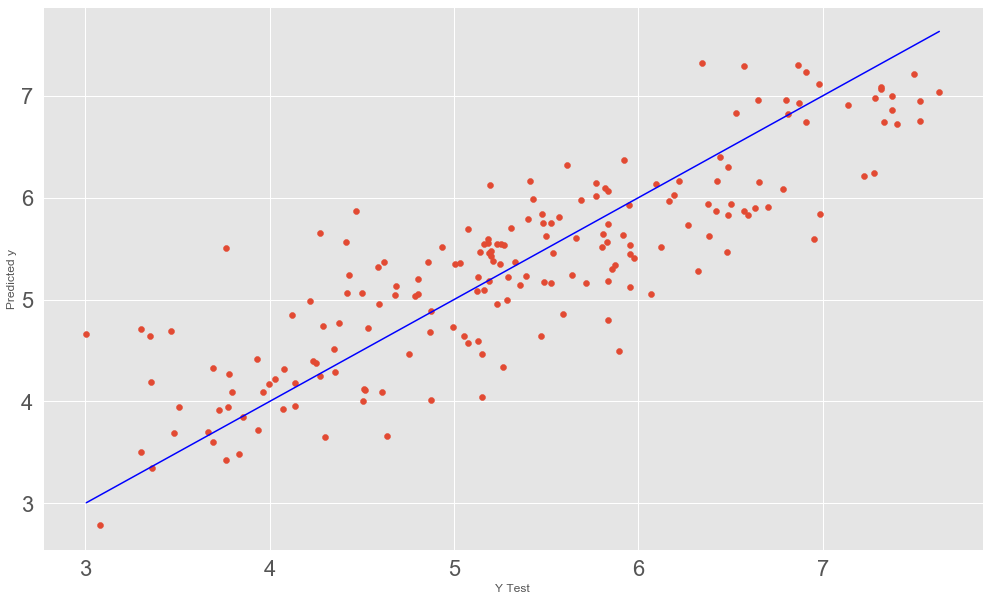

In [763]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
lineStart = y_test.min()
lineEnd = y_test.max()
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'blue')
plt.ylabel('Predicted y')
#plt.plot(c='blue',linewidth=2, color = 'r')
plt.show()

## REGRESSION MODEL WITH CONTINENT 

In [640]:
df_with_dummies = pd.get_dummies(df, prefix='continent', columns=['continent'])

In [642]:
df_with_dummies = df_with_dummies.rename(columns={'continent_North America': 'continent_North_America', 
                                   'continent_South America': 'continent_South_America'})

In [683]:
reg_with_continent = ols(formula="HappinessScore~GDP+Family+Freedom+Generosity+continent_Asia+continent_Australia+continent_Europe+continent_North_America+continent_South_America",data=df_with_dummies).fit()


In [891]:
reg_with_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.06e-203
Time:                        13:52:58   Log-Likelihood:                -473.21
No. Observations:                 626   AIC:                             966.4
Df Residuals:                     616   BIC:                             1011.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4202      0.084     28.776      0.000       2.255       2.585
GDP                         1.5030      0.074     20.383      0.000       1.358       1.648
Family                      0.4129      0.084      4.899      0.000       0.247       0.578
Freedom                     1.7156      0.162     10.565      0.000       1.397       2.035
Generosity                  0.8076      0.182      4.437      0.000       0.450       1.165
continent_Asia              0.0300      0.063      0.478      0.633      -0.093       0.153
continent_Australia         0.8330      0.201      4.137      0.000       0.438       1.228
continent_Europe            0.4105      0.072      5.663      0.000       0.268       0.553
continent_North_America     0.7297      0.086      8.522      0.000       0.562       0.898
continent_South_America     0.8073      0.097      8.361      0.000       0.618       0.997
==============================================================================
Omnibus:                        7.495   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.969
Skew:                          -0.151   Prob(JB):                       0.0113
Kurtosis:                       3.503   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [771]:
train, test= train_test_split(df_with_dummies, test_size=0.2, random_state=0)

In [879]:
X4 = df_with_dummies[['GDP','Freedom','Family','Trust_GovCorruption','Generosity','continent_Africa', 'continent_Asia', 'continent_Australia',
       'continent_Europe', 'continent_North_America',
       'continent_South_America']]
y4 = df_with_dummies.loc[:,'HappinessScore']

In [880]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [881]:
y_hat_train4 = reg_with_continent.predict(X_train4)
y_hat_test4 = reg_with_continent.predict(X_test4)

In [882]:
train_mse4 = mean_squared_error(y_train4, y_hat_train4)
test_mse4 = mean_squared_error(y_test4, y_hat_test4)
print('Train Mean Squarred Error:', train_mse4)
print('Test Mean Squarred Error:', test_mse4)

Train Mean Squarred Error: 0.25975492927397204
Test Mean Squarred Error: 0.28844282951915845


In [878]:
print('AIC for final model:', reg_with_continent.aic)
print('BIC for final model:', reg_with_continent.bic)

AIC for final model: 966.4159056681984
BIC for final model: 1010.8094093791995


In [ ]:
# The new model on training dataset is pre

In [892]:
model_fit = ols(formula="HappinessScore~GDP+Family+Freedom+Generosity+continent_Asia+continent_Australia+\
                continent_Europe+continent_North_America+continent_South_America",data=train).fit()

In [893]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 28 Nov 2019   Prob (F-statistic):          1.20e-162
Time:                        13:53:55   Log-Likelihood:                -366.69
No. Observations:                 500   AIC:                             753.4
Df Residuals:                     490   BIC:                             795.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5057      0.092     27.158      0.000       2.324       2.687
GDP                         1.4891      0.081     18.365      0.000       1.330       1.648
Family                      0.3634      0.092      3.957      0.000       0.183       0.544
Freedom                     1.6693      0.176      9.504      0.000       1.324       2.014
Generosity                  0.8135      0.201      4.050      0.000       0.419       1.208
continent_Asia              0.0368      0.069      0.529      0.597      -0.100       0.173
continent_Australia         0.8155      0.247      3.308      0.001       0.331       1.300
continent_Europe            0.4243      0.080      5.297      0.000       0.267       0.582
continent_North_America     0.6958      0.095      7.338      0.000       0.509       0.882
continent_South_America     0.8025      0.105      7.634      0.000       0.596       1.009
==============================================================================
Omnibus:                        6.247   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.950
Skew:                          -0.171   Prob(JB):                       0.0310
Kurtosis:                       3.465   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualize training testing error

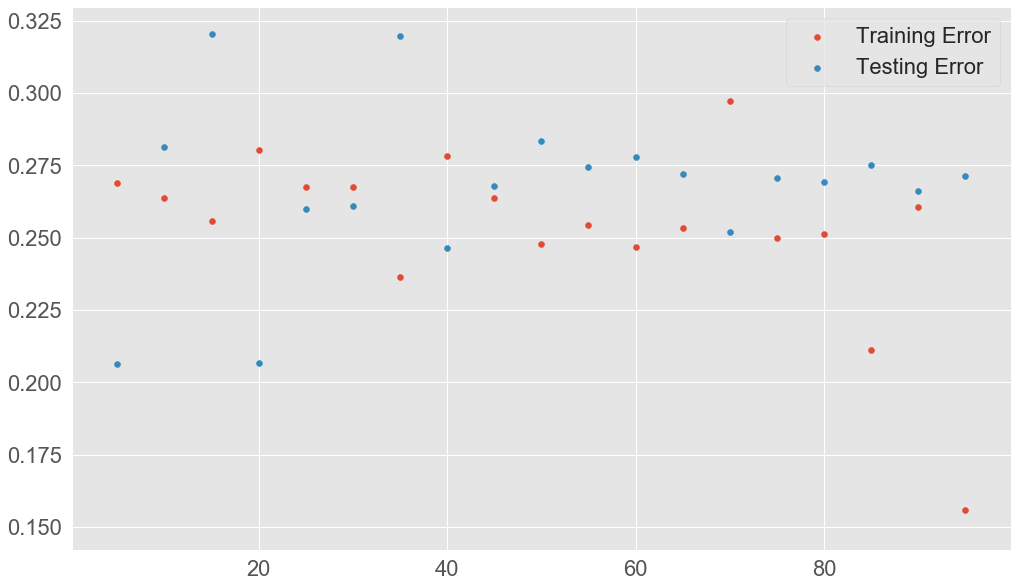

In [723]:
import random
random.seed(11)
linreg = LinearRegression()
train_err = []
test_err = []
t_sizes = list(range(5,100,5)) 
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = reg_with_continent.predict(X_train)
    y_hat_test = reg_with_continent.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [ ]:
# interate

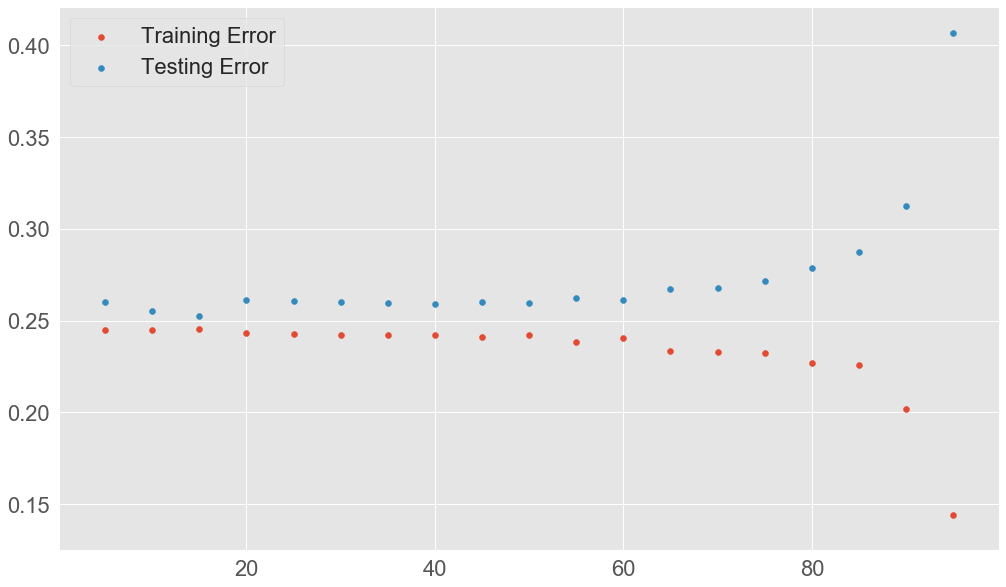

In [718]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [797]:
err = []
for pred,actual in zip(y_pred,y_test):
    sq_err = (pred - actual) ** 2
    err.append(sq_err)
mean_sq_err = np.array(err).mean()
root_mean_sq_err = np.sqrt(mean_sq_err)
root_mean_sq_err


0.5769181390195842

In [822]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [849]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [850]:
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [851]:
X_test_transformed.shape

(188, 6)

In [852]:
X_train.shape

(438, 6)

In [853]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (438,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (188,1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [855]:
print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

Train Error Unpenalized Linear Model 123.45835091876494
Test Error Unpenalized Linear Model 63.51627484796687


In [854]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

Train Error Ridge Model 123.55108723791608
Test Error Ridge Model 63.624382517011064




Exception: Data must be 1-dimensional